<a href="https://colab.research.google.com/github/Julyxdias/pilha/blob/main/html_pilha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo do algoritmo é ler um arquivo HTML linha por linha, identificar a estrutura hierárquica de tags e encontrar o texto que está na maior profundidade de aninhamento de tags, ou seja, o texto que aparece dentro do maior número de tags abertas. A lógica pode ser dividida em três partes principais


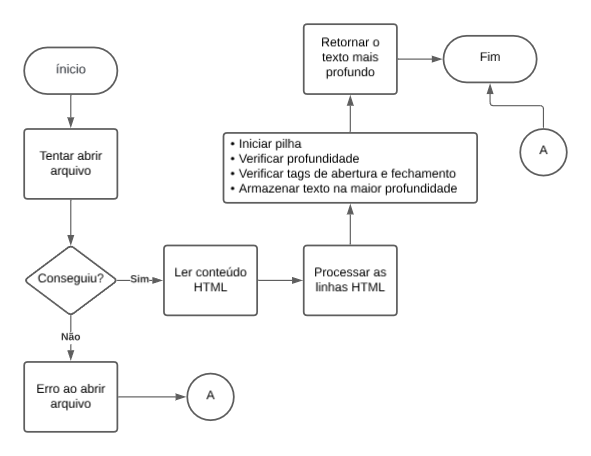


PSEUDO

```
FUNÇÃO obter_texto_mais_profundo_html(caminho_arquivo):

    TENTE:
        ABRIR arquivo em caminho_arquivo com codificação UTF-8
        LER todas as linhas do arquivo em conteudo_html
        RETORNAR processar_linhas_html(conteudo_html)
    EXCEÇÃO:
        RETORNAR "Erro ao abrir o arquivo: {erro}"

CLASSE Node:
    ATRIBUTOS:
        data: dado armazenado (nome da tag)
        next: referência ao próximo nó (inicialmente nulo)

CLASSE StackLinkedList:
    ATRIBUTOS:
        top: referência ao nó no topo (inicialmente nulo)
    
    MÉTODO push(data):
        CRIAR novo_nó com data
        DEFINIR novo_nó.next como top
        DEFINIR top como novo_nó
    
    MÉTODO pop():
        SE top é nulo:
            RETORNAR nulo
        ARMAZENAR dado em top.data
        DEFINIR top como top.next
        RETORNAR dado
    
    MÉTODO peek():
        SE top é nulo:
            RETORNAR nulo
        RETORNAR top.data
    
    MÉTODO is_empty():
        RETORNAR top é nulo

FUNÇÃO processar_linhas_html(linhas_html):
    INICIALIZAR pilha como StackLinkedList
    INICIALIZAR maxima_profundidade como 0
    INICIALIZAR texto_mais_profundo como nulo
    INICIALIZAR profundidade_atual como 0

    PARA cada linha em linhas_html:
        linha_sem_espacos = REMOVER espaços em branco de linha
        SE linha_sem_espacos está vazia:
            CONTINUAR

        SE linha_sem_espacos começa com "</" e termina com ">":
            nome_tag = EXTRAI texto entre "</" e ">"
            SE pilha está vazia OU topo da pilha não é nome_tag:
                CONTINUAR
            REMOVER topo da pilha
            profundidade_atual = profundidade_atual - 1

        SENÃO SE linha_sem_espacos começa com "<" e termina com ">":
            SE contém espaço no nome da tag e não é auto-fechada:
                CONTINUAR
            nome_tag = EXTRAI texto entre "<" e ">" ou "<" e "/>"
            EMPILHAR nome_tag na pilha
            profundidade_atual = profundidade_atual + 1

        SENÃO:
            SE profundidade_atual > maxima_profundidade:
                maxima_profundidade = profundidade_atual
                texto_mais_profundo = linha_sem_espacos

    RETORNAR texto_mais_profundo SE existe, SENÃO retornar ""


```




In [13]:
def obter_texto_mais_profundo_html(caminho_arquivo):
    try:
        with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
            conteudo_html = arquivo.readlines()  # Lê todas as linhas do arquivo
        return processar_linhas_html(conteudo_html)  # Chama a função para processar as linhas
    except Exception as e:
        return f"Erro ao abrir o arquivo: {e}"  # Retorna erro caso o arquivo não seja aberto

# Definindo a classe PilhaListaEncadeada para implementar a pilha
class Node:
    def __init__(self, data):
        self.data = data #Armazena o dado do nó
        self.next = None #Referência ao próximo nó na lista

class StackLinkedList:
    def __init__(self):
        self.top = None #Referência ao nó no topo da pilha

    #Novos nós.
    def push(self, data):
        new_node = Node(data) #cria nó
        new_node.next = self.top # próximo nó
        self.top = new_node # topo da pilha

    #Remove e retorna o elemento do topo da pilha.
    def pop(self):
        if self.top is None:
            return None
        popped = self.top.data
        self.top = self.top.next
        return popped

    #Retorna o elemento do topo da pilha sem removê-lo.
    def peek(self):
        if self.top is None:
            return None
        return self.top.data

    #Verifique se a pilha está vazia.
    def is_empty(self):
        return self.top is None

    #Retorna o elemento do topo da pilha sem removê-lo.
    def peek(self):
        if self.top is None:
            return None
        return self.top.data

    #Verifique se a pilha está vazia.
    def is_empty(self):
        return self.top is None

# Função para processar as linhas HTML e rastrear a profundidade das tags
def processar_linhas_html(linhas_html):
    pilha = StackLinkedList()  # Pilha para rastrear tags abertas
    maxima_profundidade = 0  # Armazena a maior profundidade das tags
    texto_mais_profundo = None  # Armazena o texto mais profundo
    profundidade_atual = 0  # Profundidade atual enquanto processa as linhas

    for linha in linhas_html:
        linha_sem_espacos = linha.strip()  # Remove espaços em branco extras

        if not linha_sem_espacos:  # Ignora linhas vazias
            continue

        # Verifica se a linha contém uma tag de fechamento
        if linha_sem_espacos.startswith("</") and linha_sem_espacos.endswith(">"):
            nome_tag = linha_sem_espacos[2:-1]  # Extrai o nome da tag
            if pilha.is_empty() or pilha.peek() != nome_tag:
                continue  # Ignora a tag malformada, sem retornar erro
            pilha.pop()  # Remove a tag do topo, pois foi fechada corretamente
            profundidade_atual -= 1  # Diminui a profundidade

        # Verifica se a linha contém uma tag de abertura
        elif linha_sem_espacos.startswith("<") and linha_sem_espacos.endswith(">"):
            if " " in linha_sem_espacos[1:-1] and not linha_sem_espacos.endswith("/>"):
                continue  # Ignora tag malformada com espaços ou não auto-fechada
            nome_tag = linha_sem_espacos[1:-1] if linha_sem_espacos.endswith("/>") else linha_sem_espacos[1:-1]
            pilha.push(nome_tag)  # Empilha o nome da tag
            profundidade_atual += 1  # Aumenta a profundidade

        else:
            # Quando não for uma tag, verifica a profundidade atual
            if profundidade_atual > maxima_profundidade:
                maxima_profundidade = profundidade_atual  # Atualiza a profundidade
                texto_mais_profundo = linha_sem_espacos  # Armazena o texto encontrado na maior profundidade

    # Se a pilha não estiver vazia, significa que há tags não fechadas corretamente
    if not pilha.is_empty():

      return texto_mais_profundo if texto_mais_profundo else ""  # Retorna o texto mais profundo ou uma string vazia

# Caminho do arquivo local
arquivo = "/content/Feed _ LinkedIn.html"

# Chama a função para obter o texto mais profundo
resultado = obter_texto_mais_profundo_html(arquivo)
print("Texto mais profundo encontrado:", resultado)

Texto mais profundo encontrado: Comentar
